In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print ("Most recent date:", latest_date)

Most recent date: ('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last 12 months:", last_twelve)


Last 12 months: 2016-08-23


Text(0, 0.5, 'Inches')

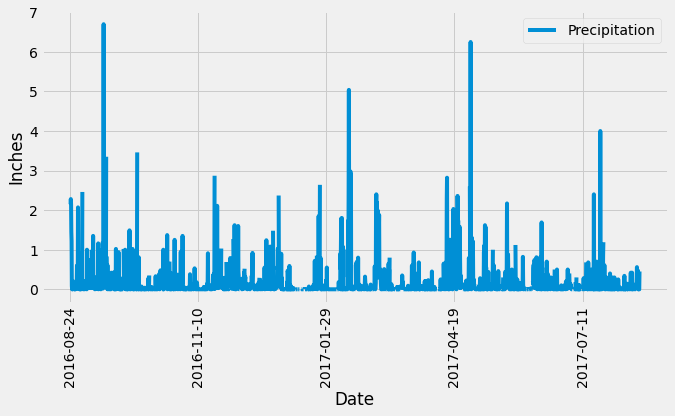

In [12]:
# Perform a query to retrieve the data and precipitation scores
data_query=session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%Y-%m-%d",Measurement.date)>last_twelve).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(data_query,columns=['Date', 'Precipitation']).set_index("Date")

# Sort the dataframe by date
df.sort_values(by=['Date'], inplace=True, ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line",figsize=(10,5), rot="vertical")
plt.xlabel("Date")
plt.ylabel("Inches")

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"COUNT: {df['Precipitation'].count()}")
print(f"AVG: {df['Precipitation'].mean()}")
print(f"MEDIAN: {df['Precipitation'].median()}")
print(f"STDEV: {df['Precipitation'].std()}")
print(f"MIN: {df['Precipitation'].min()}")
print(f"MAX: {df['Precipitation'].max()}")

COUNT: 2015
AVG: 0.17646153846153778
MEDIAN: 0.02
STDEV: 0.4602883636813204
MIN: 0.0
MAX: 6.7


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
stations = num_stations = session.query(Station).count()
print("There are {} stations.".format(stations))

There are 9 stations.


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostactive_station=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc()).all())
mostactive_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]

mostactive_st=(session.query(*tobs).filter(Measurement.station=='USC00519281').all())
mostactive_st

mostactive_st_temp=pd.DataFrame(mostactive_st, columns=['Station', 'Min', 
                                                          'Max', 'Avg'])
mostactive_st_temp.set_index('Station', inplace=True)
mostactive_st_temp

,Min,Max,Avg
Station,,,
USC00519281,54.0,85.0,71.663781


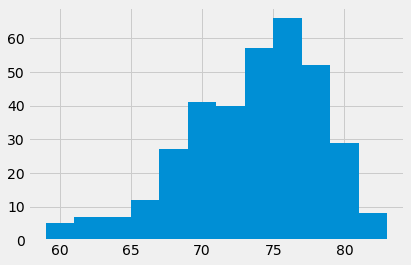

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > last_twelve)
                  .filter(Measurement.station=='USC00519281').all())
last_tobs_df=pd.DataFrame(last_tobs)
plt.hist(last_tobs_df[1],bins=12)
plt.show()


# Close session

In [19]:
# Close Session
session.close()